# e.g. 1: Compare monthly SST climatology from daily and monthly inputs from 1 forecast run.

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

BEGIN
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
cafe_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r2i1p4f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r2i1p4f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r3i1p4f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r3i1p4f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r4i1p4f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r4i1p4f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r5i1p4f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r5i1p4f1_gn_201601-202012.nc']]
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
Diag= False
monthly_clim_anom: Produce annual output rather than monthly.
monthly_c

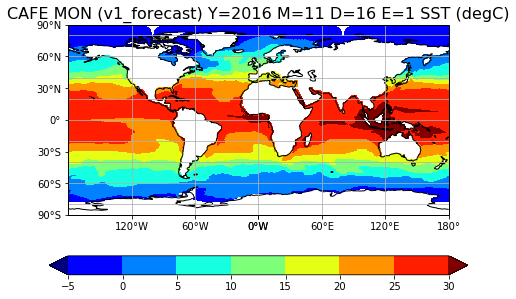

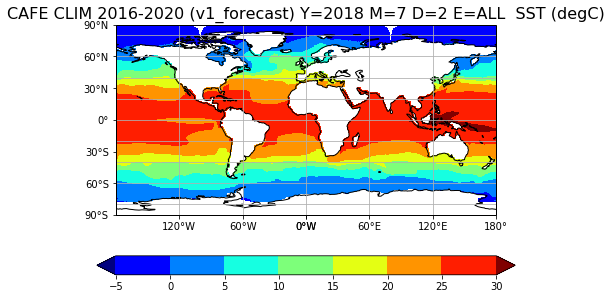

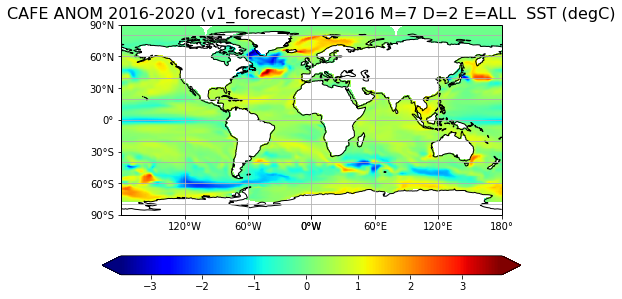

cafe_daily_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r2i1p4f1/Oday/tos/gn/v20171025/tos_Oday_historical_CAFE-1-0_r2i1p4f1_gn_20160101-20211231.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r3i1p4f1/Oday/tos/gn/v20171025/tos_Oday_historical_CAFE-1-0_r3i1p4f1_gn_20160101-20211231.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r4i1p4f1/Oday/tos/gn/v20171025/tos_Oday_historical_CAFE-1-0_r4i1p4f1_gn_20160101-20211231.nc']]
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
n_data_funcs.calculate_quantity: Using whole lat/lon region.


/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: Produce annual output rather than monthly.
monthly_clim_anom: All years have 12 months.


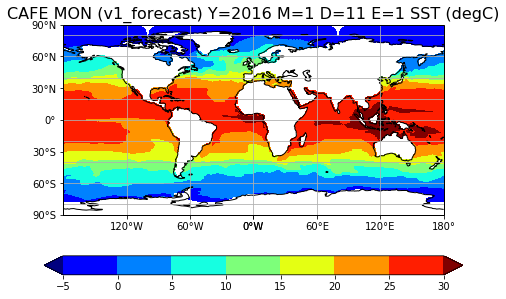

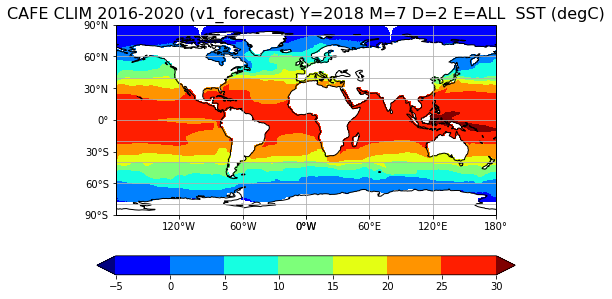

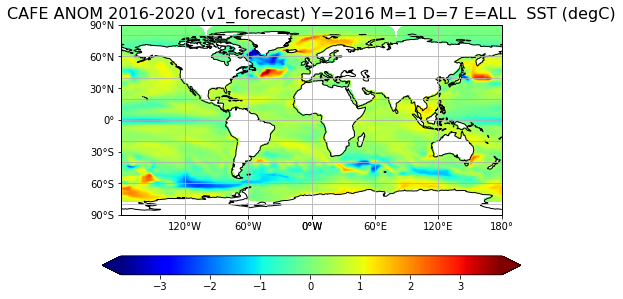

END


In [14]:
print('BEGIN')

import socket
import re
import os

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-32-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  %matplotlib inline

  __file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

  import sys
  import inspect
  from decadal_diag import n_data_funcs  
  import cartopy.crs as ccrs
  from cartopy.util import add_cyclic_point
  import numpy as np
  
  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number
  
  model='CAFE'
  
  pval=1 #v1_forecast
  pval=4 #v0_forecast
  
  cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', 5:'v2', 6:'v3', 7:'aug17p'}
  
  ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Omon'

  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(2,11+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_201601-202012.nc'] #1 file
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)

  print('cafe_monthly_files=',cafe_monthly_files)
  
  cbeg=2016
  cend=2020
  abeg=2016
  aend=2020

  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number, \
    shade_2d_curvilinear, \
    shade_2d_simple

  grid_label='cafep'
  cafe_calendar='julian'
  
#===============================================================================

  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar=cafe_calendar)
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_sst_from_monthly=cafe_monthly_files.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_sst_annual_climatology_from_monthly,cafe_sst_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_sst_from_monthly, AnnOut=True, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  month_to_plot=10 #base 0
  year_to_plot=0 #base 0
  ensemble_to_plot=1 #base 0
  
  clevs=None
  step=5;clevs=sorted(list(set(np.arange(-5, 30+step, step).tolist())))

  shade_2d_curvilinear(cafe_sst_from_monthly[month_to_plot,ensemble_to_plot,], \
    xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
    title=model+' MON ('+cafe_experiment_titles[pval]+')'+ \
    ' Y='+str(cafe_monthly_files.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_monthly_files.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_monthly_files.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)
    
  shade_2d_curvilinear(np.average(cafe_sst_annual_climatology_from_monthly[:],axis=0), \
    xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
    title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval]+')'+ \
    ' Y='+str(cafe_monthly_files.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_monthly_files.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_monthly_files.date_time_stamp_climatology.day)+' E=ALL'+' '+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)
  
  shade_2d_curvilinear(np.average(cafe_sst_annual_anomaly_from_monthly[year_to_plot,:],axis=0), \
    xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
    title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval]+')'+ \
    ' Y='+str(cafe_monthly_files.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_monthly_files.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_monthly_files.date_time_stamp_anomaly[year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=None)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  table='Oday'

  cafe_daily_files,cafe_daily_files_flat=[],[]
  for ensemble in range(2,4+1):
    cafe_inner_daily_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    daily_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_20160101-20211231.nc'] #1 file
    for file in daily_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_daily_files.append(idir+'/'+file)
    cafe_daily_files.append(cafe_inner_daily_files)

  print('cafe_daily_files=',cafe_daily_files)

  cafe_daily_files=n_data_funcs(input_files=cafe_daily_files,input_var_name=ivar_str_cafe)

  cafe_daily_files.calculate_filedatetime_info(calendar=cafe_calendar)

  cafe_daily_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')

  cafe_sst_daily=cafe_daily_files.calculate_quantity('dummy',quantity='latlon_region') #'pacific_region,0,89,0,143'

  cafe_daily_files.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

  cafe_monthly_sst_from_daily=cafe_daily_files.daily_to_monthly(EndOption=1,input=cafe_sst_daily)

  cafe_sst_annual_climatology_from_daily,cafe_sst_annual_anomaly_from_daily=cafe_daily_files.monthly_clim_anom( \
    Diag=False, input=cafe_monthly_sst_from_daily, AnnOut=True, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  shade_2d_curvilinear(cafe_monthly_sst_from_daily[month_to_plot,ensemble_to_plot,], \
    xyvals=(cafe_daily_files.lon2d[:],cafe_daily_files.lat2d[:]), \
    title=model+' MON ('+cafe_experiment_titles[pval]+')'+ \
    ' Y='+str(cafe_daily_files.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_daily_files.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_daily_files.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)
    
  shade_2d_curvilinear(np.average(cafe_sst_annual_climatology_from_daily[:],axis=0), \
    xyvals=(cafe_daily_files.lon2d[:],cafe_daily_files.lat2d[:]), \
    title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval]+')'+ \
    ' Y='+str(cafe_daily_files.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_daily_files.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_daily_files.date_time_stamp_climatology.day)+' E=ALL'+' '+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)
  
  shade_2d_curvilinear(np.average(cafe_sst_annual_anomaly_from_daily[year_to_plot,:],axis=0), \
    xyvals=(cafe_daily_files.lon2d[:],cafe_daily_files.lat2d[:]), \
    title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval]+')'+ \
    ' Y='+str(cafe_daily_files.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_daily_files.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_daily_files.date_time_stamp_anomaly[year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=None)
  
#===============================================================================

print('END')